Note: the fastDTW distance of x&y and scale(x)&scale(y) are the same

In [9]:
library("rucrdtw")

Look at the following examples 

In [29]:
vignette("using_rucrdtw", package = "rucrdtw")

starting httpd help server ... done


create a random long time series

In [3]:
set.seed(123)
# cummulative sum (rwalk has increment obeying uniform distribution, 
# like a random walk but each walk step is unif distributed
rwalk = cumsum(runif(1e7, min = -0.5, max = 0.5)) 

Pick a random subsequence of 100 elements as a query

In [5]:
# select any index
qstart = sample(length(rwalk), 1) 
query = rwalk[qstart:(qstart+100)]

Since both query and data are R vectors, we use the vector-vector methods for the search.

In [14]:
# dtw: vector to vector (vv)
system.time(dtw_search <- ucrdtw_vv(data = rwalk, 
                                    query = query, dtwwindow = 0.05))

   user  system elapsed 
   1.75    0.01    1.98 

In [20]:
dtw_search

$location
[1] 9200127

$distance
[1] 1.538004e-09

$prunedKim
[1] 77.96116

$prunedKeogh
[1] 20.03386

$prunedKeogh2
[1] 1.9161

$dtwCalc
[1] 0.08888

attr(,"class")
[1] "ucrdtw"

In [25]:
# test whether it captures the approximately correct position 
all.equal(qstart, dtw_search$location)
dtw_search$location
qstart

[1] TRUE

[1] 9200127

[1] 9200127

If we use fastEuclidean (search for the best matching subsequence in data for query)

In [26]:
system.time(ed_search <- ucred_vv(data = rwalk, query = query))

   user  system elapsed 
   1.54    0.41    2.33 

In [27]:
all.equal(qstart, ed_search$location)

[1] TRUE

Further testing: different kind of data tyoe (normal, cyclic ...)

In [38]:
data("synthetic_control")
# ?synthetic_control   # run this to get further information

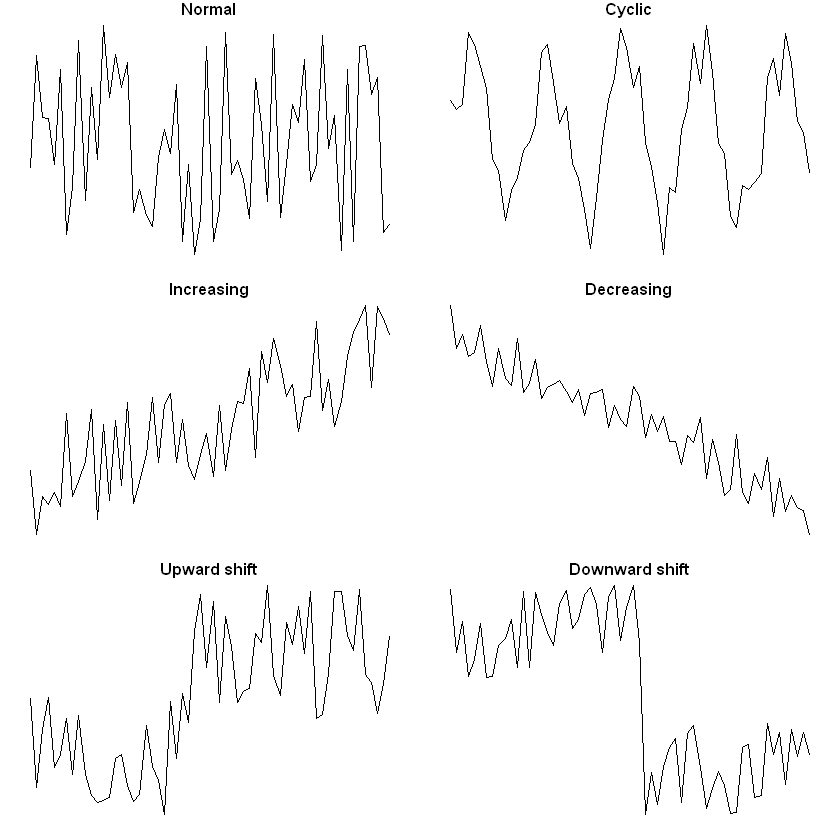

In [35]:
# To see some typical time series in this dataset
par(mfrow = c(3,2),
    mar = c(1,1,1,1))
classes = c("Normal", "Cyclic", "Increasing", "Decreasing", "Upward shift", "Downward shift")
for (i in 1:6){
  plot(synthetic_control[i*100-99,], type = "l", xaxt = "n", yaxt = "n", ylab="", xlab = "", bty="n", main=classes[i])
}

 Remove a query from the data set, and then searching for a closest match:

In [40]:
index <- 600
query <- synthetic_control[index,] # should be a downward shift time series

In [41]:
# dtw and ed, matrix to vector
dtw_search <- ucrdtw_mv(synthetic_control[-index,], query, 0.05, byrow = TRUE)
ed_search <- ucred_mv(synthetic_control[-index,], query, byrow= TRUE)

Plot the results:

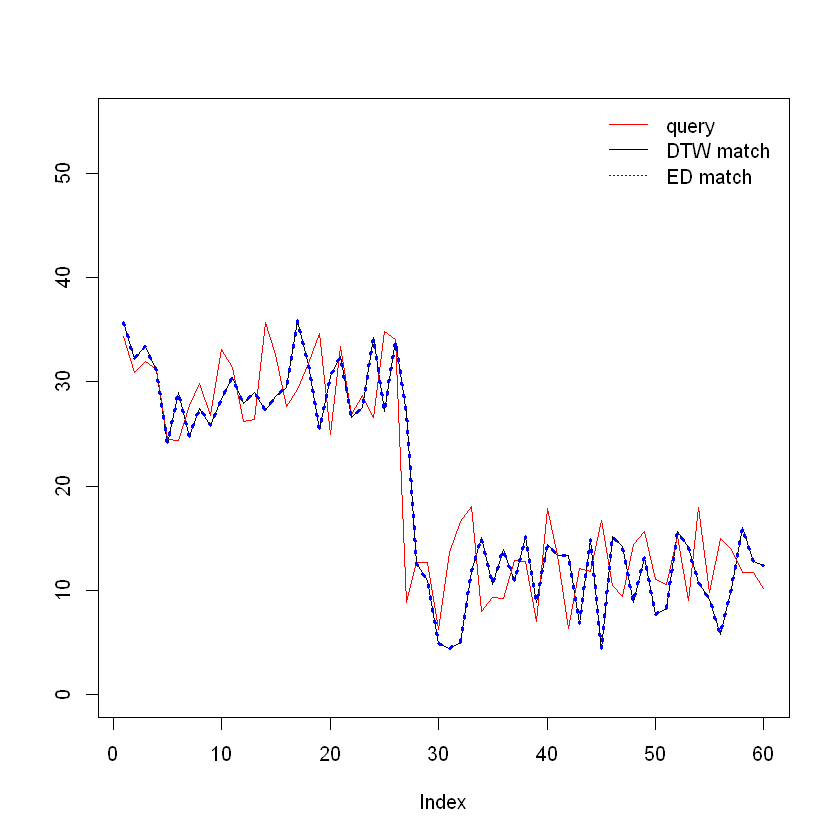

In [43]:
plot(synthetic_control[dtw_search$location,], type="l", ylim=c(0,55), ylab="")
lines(query, col="red")
lines(synthetic_control[ed_search$location,], col="blue", lty=3, lwd=3)
legend("topright", legend = c("query", "DTW match", "ED match"), 
       col=c("red", "black", "blue"), lty=c(1,1,3), bty="n")

In [45]:
dtw_search

$location
[1] 527

$distance
[1] 1.907935

$prunedKim
[1] 0.2782415

$prunedKeogh
[1] 0.7846411

$prunedKeogh2
[1] 0.00556483

$dtwCalc
[1] 98.93155

attr(,"class")
[1] "ucrdtw"

In [46]:
ed_search

$location
[1] 527

$distance
[1] 4.234653

attr(,"class")
[1] "ucred"

# other test

In [123]:
set.seed(9)
m = 100
n = 500
X = matrix(runif(m*n),m,n)

In [126]:
sigma = matrix(0,n,n)
system.time({
    for (i in 1:(n-1)){
        for (j in i:n){
            sigma[i,j] = ucrdtw_vv(X[,i], X[,j], 0.05)$distance
        }
    }
})

   user  system elapsed 
   5.38    4.86   10.47 

In [127]:
sigma[lower.tri(sigma)] = t(sigma)[lower.tri(sigma)]
sigma


0.000000,7.332997,7.423375,7.112230,7.697961,5.972455,7.186663,7.693961,6.901614,6.892024,...,7.489042,6.544267,8.044311,7.319648,6.764667,7.086344,6.622614,6.915535,7.195151,7.014553
7.332997,0.000000,6.752331,7.339619,6.535660,7.755006,7.076018,6.509859,7.883074,7.293870,...,7.172457,7.619551,7.274074,6.872443,7.395997,6.683185,7.351073,7.328237,6.830227,7.493394
7.423375,6.752331,0.000000,7.400411,6.706024,6.874155,7.074126,6.522161,7.443601,6.528260,...,6.580919,7.136087,6.713999,6.446127,7.651615,6.607851,6.488263,7.071615,6.555234,6.646627
7.112230,7.339619,7.400411,0.000000,7.577684,7.669311,7.891047,7.705465,7.242430,5.852942,...,6.850891,7.126869,6.592090,6.898121,7.235041,6.313805,6.796768,7.535077,6.927990,7.613842
7.697961,6.535660,6.706024,7.577684,0.000000,7.530692,7.029589,6.363989,8.397536,7.138991,...,6.762541,7.686125,7.483029,7.104565,7.839149,7.374731,6.921143,7.269307,7.244717,6.614343
5.972455,7.755006,6.874155,7.669311,7.530692,0.000000,7.188438,7.763950,6.892274,6.920874,...,7.403254,6.616416,7.909588,7.821595,7.672798,7.914276,6.166738,6.833255,6.961519,6.685854
7.186663,7.076018,7.074126,7.891047,7.029589,7.188438,0.000000,7.383725,7.670401,7.548048,...,7.223561,7.701222,8.159262,6.621014,7.504232,7.838371,6.972587,6.890290,7.084873,6.872113
7.693961,6.509859,6.522161,7.705465,6.363989,7.763950,7.383725,0.000000,7.521678,6.792250,...,6.849033,7.711702,7.057395,6.814933,7.337252,7.148081,7.253933,7.374154,6.687949,7.487300
6.901614,7.883074,7.443601,7.242430,8.397536,6.892274,7.670401,7.521678,0.000000,7.219403,...,7.437216,6.536162,7.531378,7.402409,6.881053,7.184084,6.675388,7.149873,7.624839,7.877302
6.892024,7.293870,6.528260,5.852942,7.138991,6.920874,7.548048,6.792250,7.219403,0.000000,...,5.969647,6.612227,6.883139,6.995874,6.772533,6.208851,6.887832,7.519337,6.981500,6.854127
6.793151,7.357473,7.200013,7.016230,7.687530,6.840108,7.483211,8.161676,7.024988,7.245601,...,7.181593,6.326548,7.670463,7.687760,7.244475,7.227265,6.896083,6.996008,7.445443,7.334461
